# Theory Basics: the "Quantum" Behind Quantum Computing

This notebook is for beginners! :D (Those who are interested in quantum computing but have not experience.) It's <strong>part one</strong> of the Theory Basics series, which is all about the basics of how quantum computing works. Here, I cover <strong>qubits and superposition</strong>.

#### Prerequisites:
* Familiar with python (e.g. functions, classes, methods, math operations) 
* Familiar with matrices (linear algebra is the language of quantum computing)
* Familiar with jupyter notebooks (know how to run and get around a jupyter notebook)

If you meet these prereqs, great! :D If not, this notebook may cause confusion or even discourage you from learning more about quantum computing, which is the exact <strong>opposite</strong> of what I intend. I <strong>strongly</strong> encourage you to familiarize yourself with those topics before going on. If you don't have access to a college level linear algebra or quantum mechanics course, I'd suggest Khan academy for linear algebra—particularly topics related to eigenvectors and eigenvalues.

Let's dive in!

## Qiskit
To get started, you'll need to [install qiskit](https://qiskit.org/documentation/install.html#install). Qiskit is IBM's open source python library for quantum computing. It has everything you need to make your own algorithms, execute well known algorithms (e.g. QAOA, VQE), and simulated or <strong>real</strong> quantum computers. There are other open source quantum computing libraries out there, but I'll use qiskit for now. I won't cover the details of qiskit, so if you want to learn more, <strong>definitely</strong> go through their "getting started" [tutorials](https://github.com/Qiskit/qiskit-iqx-tutorials/blob/master/qiskit/1_start_here.ipynb).

## Note
I'm going to introduce A LOT of new terms and ideas quickly so we can immediately begin using qiskit. Then, I'll back off and spend more time in the core concepts the qubit and superposition.

In [1]:
# This may take a few seconds
import numpy as np
import pandas as pd
from qiskit import *  # this imports all of qiskit's sublibraries
import matplotlib.pyplot as plt

## The quantum behind quantum computing is the qubit
—plain and simple. Just as normal computers store and manipulate information through [bits](https://en.wikipedia.org/wiki/Bit), quantum computers store and manipulate information through [qubits](https://www.epiqc.cs.uchicago.edu/1qubit). So... what is a qubit? And what rules to they follow?

# The Qubit

The qubit is a quantum bit. (Get it? quantum bit —> qubit? Physics jokes... anyway.) A qubit can be 0 or 1—much like it's classical companion the bit. However, what distinguishes a qubit from a bit, is (obviously) the <strong>quantum</strong> part! The quantum part of a qubit follows different rules than a bit. The rules are called quantum mechanics, and if you're clever, they <em>can</em> (but not always) lead to <strong>EXPONENTIALLY</strong> faster computation than a computer using bits. Thus, the appeal for making quantum computers.

Let's highlight the difference between a bit and a qubit. A classical bit is <strong>always</strong> 100% 0 <strong>OR</strong> 1, but never both at the same time. A qubit can be both 0 and 1 at the same time. For instance, a qubit can be 55% 0 and 45% 1. A qubit can have <strong>any probability</strong> of being 0 or 1 as long as those probabilities add to one. 12.304985723495% 0 and 87.695014276505% 1 is totally possible.

To work with qubits in qiskit, we start with a <strong>quantum circuit</strong>. The circuit part of quantum circuit comes from it's classical counterpart. We can simply think of the quantum circuit as <strong>where the qubits live</strong> and where we can <strong>manipulate them</strong>.

In [65]:
# Initialize a quantum circuit
circuit = QuantumCircuit(1,1)  # the argument (1,1) tells qiskit you want 1 qubit and 1 classical bit
circuit.h(0)  # this method applies the Hadamard gate to the 0th qubit
circuit.measure(0,0)  # this method measures the 0th qubit and stores the outcome in the 0th classical bit

# Visualize the constructed circuit
circuit.draw()

You just created a quantum computing code. How cool!! :D

Let's take a moment and discuss what happened. We initialized one qubit and one classical bit by called ```QuantumCircuit(1,1)```. In qiskit, all qubits are initialized to 0. Why the classical bit you ask? When the qubit is measured, the result needs to be stored somewhere. The classical bit is where the measurement result is stored. (Sometimes, the qubits and they're bit companions are referred to as quantum and classical registers.) Next, we manipulated the qubit with a [Hadamard gate](https://en.wikipedia.org/wiki/Quantum_logic_gate#Hadamard_(H)_gate). The Hadamard gate turns the qubit state 100% 0 to 50% 0 and 50% 1 or 100% 1 to 50% 0 and 50% 1. Last of all, we have to measure the qubit!

Let's run your code on a simulated quantum computer.

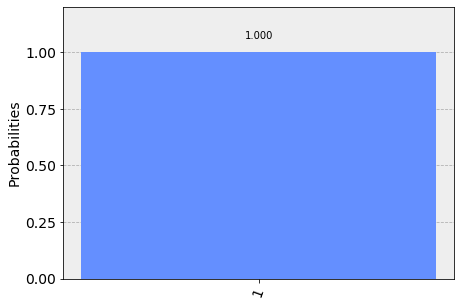

In [62]:
# Initialize a simulated quantum computer
backend = BasicAer.get_backend('qasm_simulator')
# Execute quantum circuit with chosen quantum computer and number of repetitions
result = execute(circuit, backend, shots=1).result()
# Extract classical bit results
counts = result.get_counts(circuit)

# Show results in histogram
visualization.plot_histogram(counts)

The above histogram shows the qubit probability on the vertical axis with the state 0 or 1 labeled on horizontal axis.

Hm... the Hadamard gate was supposed to turn the qubit in to 50% 0 and 50% 1. But I don't see both 0 and 1 on the horizontal axis of the histogram. <strong> What's going on????</strong>. What if you rerun the cell above a few times. Does the histogram change from 100% 0 to 100% 1 or vice versa?

What you're seeing is a subtle, but <strong>IMPORTANT point</strong> about qubits. Yes, they can be simultaneously 0 and 1, but when a qubit is measured, you will only get out 0 OR 1—<strong>NOT BOTH</strong>. To determine what probability of 0 and 1 the qubit has, the qubit goes through the process of initialization, manipulation and measurement many, many times. (Of course, the qubit is manipulated identically each time.)

Qiskit uses the parameter "shots" to let us easily change the number of times the execute is repeated. Let's try 1000 this time.

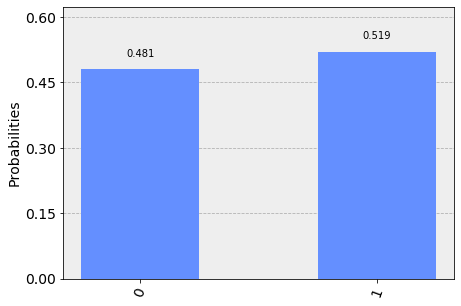

In [63]:
# Initialize a simulated quantum computer
backend = BasicAer.get_backend('qasm_simulator')
# Execute quantum circuit with chosen quantum computer and number of repetitions
result = execute(circuit, backend, shots=1000).result()
# Extract classical bit results
counts = result.get_counts(circuit)
# Show results in histogram
visualization.plot_histogram(counts)

THAT looks much better. Nearly 50% of the time the qubit is 0 and nearly 50% of the other times it's 1! Exactly how we expect the qubit to behave when using a Hadamard gate.

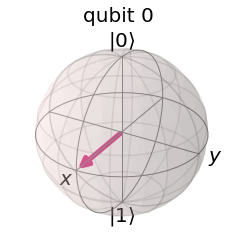

In [28]:
visualization.plot_bloch_multivector(state)

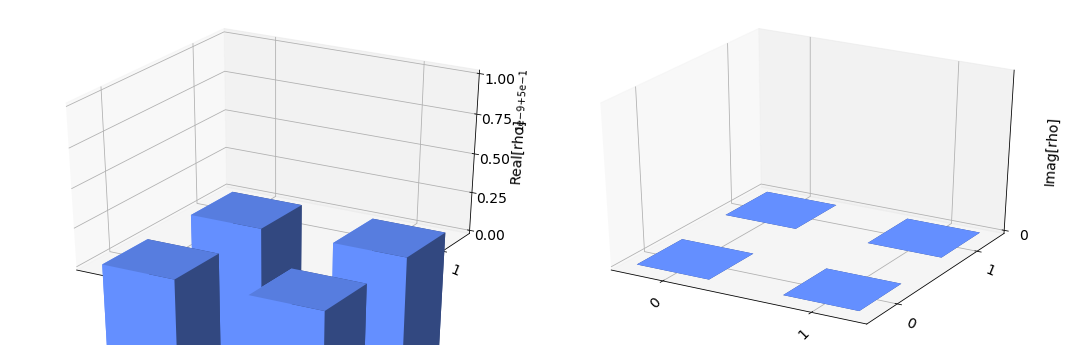

In [29]:
visualization.plot_state_city(state)

What is a qubit physically? It can be made from a lot of things. The two main requirements are the thing has to be <strong>quantum</strong> (think atoms, electronics, superconducting, photons, etc.) and the thing needs to have at least <strong>two different states</strong>. These two states are usually different energy levels and scientists say, "if we measure the qubit and get energy level "A" that's a 0. If we measure and get energy level "B", that's a 1." Scientists just pick one energy level to represent the 0 and another energy level to be the 1.

Let's use to math to illustrate. A very convention notation to use is Dirac notation. It uses a "ket" $| x \rangle$ (or "bra" $\langle x|$) to represent a qubit state. For example, a qubit 100% in the 0 state would be $|x\rangle = |0\rangle$. In general, we could say

$$
\begin{align}
|x\rangle = \alpha|0\rangle + \beta|1\rangle
\end{align}
$$

where $\alpha^2 + \beta^2 = 1$. Note the probability of being 0 or 1 is the **square** of the coefficient. A 1/3 chance of 0 and 2/3 chance of 1 would look like $|x\rangle = \dfrac{1}{\sqrt{3}}|0\rangle + \sqrt{\dfrac{2}{3}}|1\rangle$

# Superposition
The ability for a qubit to be 0 and 1 simultaneously is called superposition. Since the qubit can be "positions" 0 and 1 simultaneously, I guess physicists thought that was "super."

Generally speaking, a qubit in a superposition refers to any combination of probabilities 100-0, 50-50, 23.79-76.21. However, the most common meaning of "superposition" is a 50-50 split between 0 and 1.

You may wonder, is the qubit **really** in 0 and 1 simultaneously or is something else going on? Short answer, the vast majority of physicists are very confident the qubit **really** is 0 and 1 at the same time. Long answer, take a quantum mechanics course and learn about Bell's inequalities and hidden local variables. As someone who regularly induces atoms into superpositions, I agree with the vast majority of physicists.

A final note on superposition. **What does a superposition look like in real life?** It looks like initializing a qubit (could be an atom, superconducting circuit, photon, etc.) to 0 **or** 1, then manipulating it into a 50-50 superposition then measuring it. The measurement WILL ONLY RETURN A 0 **or** 1. To determine the superposition state of the qubit, many, many cycles of initialization, manipulation, and measurement are done. In the case of a 50-50 superposition. The detector would readout 0 and 1 each ~50% of the time.

# Superposition: quantum parallelism
Deutsch-Jozsa algorithm leverages superposition with a deterministic outcome
